In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm
#checking git push

ModuleNotFoundError: No module named 'torchsummary'

In [15]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
from utils import train_transforms, test_transforms, visualise_transformation

In [17]:
from torchvision import datasets
train_data= datasets.CIFAR10(root= '../data', train= True, download= True, transform= train_transforms)
test_data= datasets.CIFAR10(root= '../data', train= False, download= True, transform= test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [18]:
dataloader_args= dict(shuffle= True, batch_size= 64, num_workers= 2, pin_memory= True) if torch.cuda.is_available() else dict(shuffle= True, batch_size= 64)
train_loader= torch.utils.data.DataLoader(train_data, **dataloader_args)
test_loader= torch.utils.data.DataLoader(test_data, **dataloader_args)

Files already downloaded and verified
Files already downloaded and verified


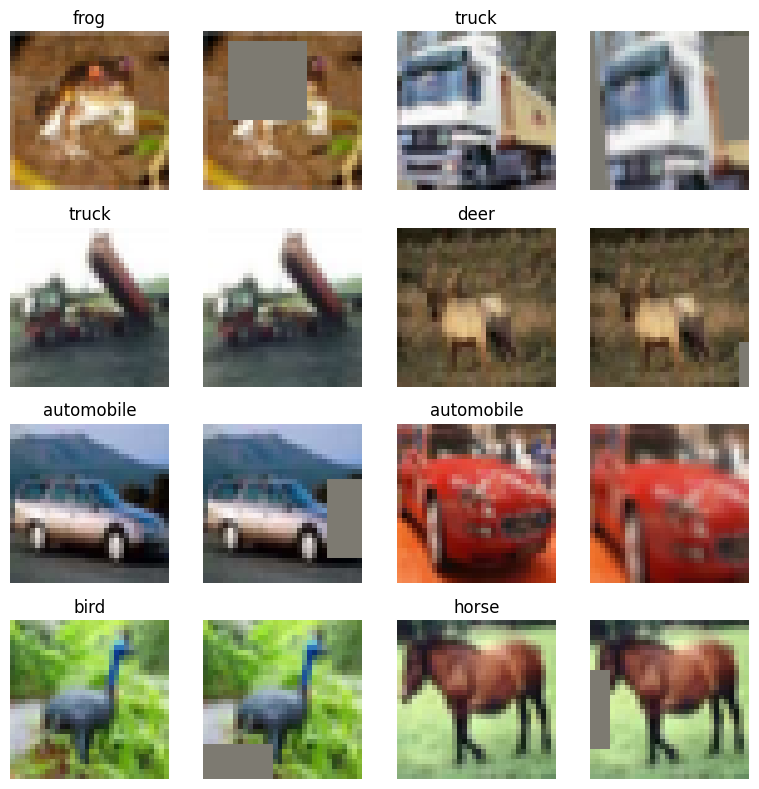

In [19]:
visualise_transformation()

In [20]:
from model import Net
model= Net().to(device)
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 32, 16, 16]           9,248
           Conv2d-14           [-1, 32,

In [21]:
from train_test import train, test

In [ ]:
from torch_lr_finder import LRFinder

optimizer = optim.SGD(model.parameters(), lr=base_lr, momentum=0.9)
lr_finder = LRFinder(model, optimizer, criterion, device='cuda')

lr_finder.range_test(trainloader, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

In [22]:
from torch.optim.lr_scheduler import OneCycleLR

epochs = 50
max_lr = 0.02  # The maximum learning rate, adjust as needed
base_lr = 0.001 # The base learning rate (or initial learning rate), adjust as needed

# Initialize the OneCycleLR scheduler
scheduler = OneCycleLR(optimizer, max_lr=max_lr, epochs=epochs, steps_per_epoch=len(train_loader))

learning_rate=[]
train_accuracy=[]
test_accuracy=[]
train_losses=[]
test_losses=[]

for epoch in range(1, epochs + 1):
    print("EPOCH:", epoch)

    print('Learning rate:', optimizer.param_groups[0]['lr'],'\n')
    learning_rate.append(optimizer.param_groups[0]['lr'])

    train_acc,train_loss= train(model, device, train_loader, optimizer,scheduler)
    test_acc,test_loss= test(model, device, test_loader)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

EPOCH: 1
Learning rate: 0.0007999999999999986 



Loss=2.0660126209259033 Accuracy=34.59: 100%|██████████| 782/782 [00:29<00:00, 26.24it/s]



Test set: Average loss: 1.4444, Accuracy: 4732/10000 (47.32%)

EPOCH: 2
Learning rate: 0.0010098186752793593 



Loss=1.090350866317749 Accuracy=44.46: 100%|██████████| 782/782 [00:29<00:00, 26.33it/s]



Test set: Average loss: 1.2428, Accuracy: 5481/10000 (54.81%)

EPOCH: 3
Learning rate: 0.0016301030601807778 



Loss=1.2137165069580078 Accuracy=49.10: 100%|██████████| 782/782 [00:29<00:00, 26.69it/s]



Test set: Average loss: 1.0977, Accuracy: 6097/10000 (60.97%)

EPOCH: 4
Learning rate: 0.002633739144717484 



Loss=1.5194135904312134 Accuracy=53.36: 100%|██████████| 782/782 [00:29<00:00, 26.70it/s]



Test set: Average loss: 0.9706, Accuracy: 6593/10000 (65.93%)

EPOCH: 5
Learning rate: 0.0039768557635311355 



Loss=1.107565999031067 Accuracy=56.44: 100%|██████████| 782/782 [00:29<00:00, 26.64it/s]



Test set: Average loss: 0.9057, Accuracy: 6806/10000 (68.06%)

EPOCH: 6
Learning rate: 0.005600742302099823 



Loss=1.29496431350708 Accuracy=58.93: 100%|██████████| 782/782 [00:30<00:00, 25.73it/s]



Test set: Average loss: 0.8417, Accuracy: 7087/10000 (70.87%)

EPOCH: 7
Learning rate: 0.00743441506827219 



Loss=1.198204755783081 Accuracy=60.79: 100%|██████████| 782/782 [00:29<00:00, 26.28it/s]



Test set: Average loss: 0.7827, Accuracy: 7313/10000 (73.13%)

EPOCH: 8
Learning rate: 0.009397720147320304 



Loss=0.8336783051490784 Accuracy=62.34: 100%|██████████| 782/782 [00:30<00:00, 25.48it/s]



Test set: Average loss: 0.7424, Accuracy: 7440/10000 (74.40%)

EPOCH: 9
Learning rate: 0.011404837107816005 



Loss=0.9374464750289917 Accuracy=63.88: 100%|██████████| 782/782 [00:29<00:00, 26.23it/s]



Test set: Average loss: 0.7314, Accuracy: 7443/10000 (74.43%)

EPOCH: 10
Learning rate: 0.013368030403554734 



Loss=1.0099726915359497 Accuracy=65.53: 100%|██████████| 782/782 [00:31<00:00, 25.15it/s]



Test set: Average loss: 0.6718, Accuracy: 7671/10000 (76.71%)

EPOCH: 11
Learning rate: 0.015201484489405396 



Loss=0.6084752678871155 Accuracy=66.54: 100%|██████████| 782/782 [00:29<00:00, 26.31it/s]



Test set: Average loss: 0.7021, Accuracy: 7605/10000 (76.05%)

EPOCH: 12
Learning rate: 0.01682505500964325 



Loss=0.6519022583961487 Accuracy=67.59: 100%|██████████| 782/782 [00:30<00:00, 25.61it/s]



Test set: Average loss: 0.6377, Accuracy: 7764/10000 (77.64%)

EPOCH: 13
Learning rate: 0.018167772085981033 



Loss=1.3730524778366089 Accuracy=68.52: 100%|██████████| 782/782 [00:30<00:00, 26.03it/s]



Test set: Average loss: 0.6112, Accuracy: 7882/10000 (78.82%)

EPOCH: 14
Learning rate: 0.01917094256878704 



Loss=1.0206291675567627 Accuracy=69.15: 100%|██████████| 782/782 [00:30<00:00, 25.34it/s]



Test set: Average loss: 0.6351, Accuracy: 7819/10000 (78.19%)

EPOCH: 15
Learning rate: 0.01979071564519008 



Loss=0.7950791716575623 Accuracy=69.93: 100%|██████████| 782/782 [00:29<00:00, 26.28it/s]



Test set: Average loss: 0.5913, Accuracy: 7997/10000 (79.97%)

EPOCH: 16
Learning rate: 0.019999999934125337 



Loss=0.49547702074050903 Accuracy=70.40: 100%|██████████| 782/782 [00:29<00:00, 26.18it/s]



Test set: Average loss: 0.6084, Accuracy: 7968/10000 (79.68%)

EPOCH: 17
Learning rate: 0.01995964014568637 



Loss=1.254533290863037 Accuracy=70.96: 100%|██████████| 782/782 [00:29<00:00, 26.34it/s]



Test set: Average loss: 0.5664, Accuracy: 8070/10000 (80.70%)

EPOCH: 18
Learning rate: 0.019839091513024387 



Loss=1.135542631149292 Accuracy=71.49: 100%|██████████| 782/782 [00:29<00:00, 26.20it/s]



Test set: Average loss: 0.5567, Accuracy: 8122/10000 (81.22%)

EPOCH: 19
Learning rate: 0.01963932462284814 



Loss=1.2051022052764893 Accuracy=72.03: 100%|██████████| 782/782 [00:29<00:00, 26.10it/s]



Test set: Average loss: 0.5569, Accuracy: 8131/10000 (81.31%)

EPOCH: 20
Learning rate: 0.019361947880696288 



Loss=1.3283244371414185 Accuracy=72.29: 100%|██████████| 782/782 [00:29<00:00, 26.29it/s]



Test set: Average loss: 0.5331, Accuracy: 8235/10000 (82.35%)

EPOCH: 21
Learning rate: 0.019009194561001762 



Loss=0.6727828979492188 Accuracy=72.74: 100%|██████████| 782/782 [00:30<00:00, 25.47it/s]



Test set: Average loss: 0.5541, Accuracy: 8139/10000 (81.39%)

EPOCH: 22
Learning rate: 0.018583904826079144 



Loss=0.6305079460144043 Accuracy=73.32: 100%|██████████| 782/782 [00:29<00:00, 26.24it/s]



Test set: Average loss: 0.5151, Accuracy: 8266/10000 (82.66%)

EPOCH: 23
Learning rate: 0.018089502858807723 



Loss=0.8078321218490601 Accuracy=73.60: 100%|██████████| 782/782 [00:30<00:00, 25.33it/s]



Test set: Average loss: 0.5295, Accuracy: 8197/10000 (81.97%)

EPOCH: 24
Learning rate: 0.017529969293124316 



Loss=0.6467552781105042 Accuracy=73.96: 100%|██████████| 782/782 [00:29<00:00, 26.52it/s]



Test set: Average loss: 0.5159, Accuracy: 8296/10000 (82.96%)

EPOCH: 25
Learning rate: 0.016909809164299395 



Loss=0.39853617548942566 Accuracy=74.12: 100%|██████████| 782/782 [00:30<00:00, 25.48it/s]



Test set: Average loss: 0.5165, Accuracy: 8265/10000 (82.65%)

EPOCH: 26
Learning rate: 0.01623401563704201 



Loss=0.943356990814209 Accuracy=74.64: 100%|██████████| 782/782 [00:29<00:00, 26.28it/s]



Test set: Average loss: 0.5123, Accuracy: 8297/10000 (82.97%)

EPOCH: 27
Learning rate: 0.015508029803473477 



Loss=1.3233577013015747 Accuracy=75.05: 100%|██████████| 782/782 [00:29<00:00, 26.23it/s]



Test set: Average loss: 0.5112, Accuracy: 8306/10000 (83.06%)

EPOCH: 28
Learning rate: 0.014737696874652937 



Loss=0.9639896750450134 Accuracy=75.21: 100%|██████████| 782/782 [00:29<00:00, 26.12it/s]



Test set: Average loss: 0.5024, Accuracy: 8271/10000 (82.71%)

EPOCH: 29
Learning rate: 0.013929219118374817 



Loss=1.050909399986267 Accuracy=75.41: 100%|██████████| 782/782 [00:29<00:00, 26.51it/s]



Test set: Average loss: 0.4891, Accuracy: 8366/10000 (83.66%)

EPOCH: 30
Learning rate: 0.013089105922155451 



Loss=0.768826425075531 Accuracy=75.56: 100%|██████████| 782/782 [00:29<00:00, 26.08it/s]



Test set: Average loss: 0.4804, Accuracy: 8372/10000 (83.72%)

EPOCH: 31
Learning rate: 0.012224121383472243 



Loss=0.8618109226226807 Accuracy=76.26: 100%|██████████| 782/782 [00:29<00:00, 26.46it/s]



Test set: Average loss: 0.4886, Accuracy: 8406/10000 (84.06%)

EPOCH: 32
Learning rate: 0.01134122984922799 



Loss=1.1390419006347656 Accuracy=76.27: 100%|██████████| 782/782 [00:30<00:00, 25.55it/s]



Test set: Average loss: 0.4825, Accuracy: 8383/10000 (83.83%)

EPOCH: 33
Learning rate: 0.010447539842924613 



Loss=1.1838353872299194 Accuracy=76.77: 100%|██████████| 782/782 [00:29<00:00, 26.51it/s]



Test set: Average loss: 0.4742, Accuracy: 8412/10000 (84.12%)

EPOCH: 34
Learning rate: 0.009550246831011652 



Loss=0.5147552490234375 Accuracy=76.78: 100%|██████████| 782/782 [00:30<00:00, 25.25it/s]



Test set: Average loss: 0.4812, Accuracy: 8398/10000 (83.98%)

EPOCH: 35
Learning rate: 0.008656575289221285 



Loss=0.45269548892974854 Accuracy=77.11: 100%|██████████| 782/782 [00:29<00:00, 26.29it/s]



Test set: Average loss: 0.4733, Accuracy: 8454/10000 (84.54%)

EPOCH: 36
Learning rate: 0.007773720535337653 



Loss=0.8960540294647217 Accuracy=77.40: 100%|██████████| 782/782 [00:30<00:00, 25.39it/s]



Test set: Average loss: 0.4696, Accuracy: 8433/10000 (84.33%)

EPOCH: 37
Learning rate: 0.006908790796728835 



Loss=0.594316840171814 Accuracy=77.95: 100%|██████████| 782/782 [00:29<00:00, 26.88it/s]



Test set: Average loss: 0.4674, Accuracy: 8481/10000 (84.81%)

EPOCH: 38
Learning rate: 0.00606874997907966 



Loss=0.5186462998390198 Accuracy=78.03: 100%|██████████| 782/782 [00:28<00:00, 27.10it/s]



Test set: Average loss: 0.4553, Accuracy: 8485/10000 (84.85%)

EPOCH: 39
Learning rate: 0.005260361597117835 



Loss=0.3483714461326599 Accuracy=78.35: 100%|██████████| 782/782 [00:29<00:00, 26.44it/s]



Test set: Average loss: 0.4616, Accuracy: 8493/10000 (84.93%)

EPOCH: 40
Learning rate: 0.004490134318770253 



Loss=0.6022661328315735 Accuracy=78.47: 100%|██████████| 782/782 [00:28<00:00, 27.25it/s]



Test set: Average loss: 0.4491, Accuracy: 8528/10000 (85.28%)

EPOCH: 41
Learning rate: 0.003764269561195852 



Loss=0.38667604327201843 Accuracy=79.00: 100%|██████████| 782/782 [00:29<00:00, 26.94it/s]



Test set: Average loss: 0.4543, Accuracy: 8497/10000 (84.97%)

EPOCH: 42
Learning rate: 0.003088611560621062 



Loss=0.468401163816452 Accuracy=79.12: 100%|██████████| 782/782 [00:28<00:00, 27.07it/s]



Test set: Average loss: 0.4466, Accuracy: 8534/10000 (85.34%)

EPOCH: 43
Learning rate: 0.0024686003179860386 



Loss=0.43175017833709717 Accuracy=79.61: 100%|██████████| 782/782 [00:29<00:00, 26.84it/s]



Test set: Average loss: 0.4459, Accuracy: 8557/10000 (85.57%)

EPOCH: 44
Learning rate: 0.001909227799255772 



Loss=0.8961049914360046 Accuracy=80.23: 100%|██████████| 782/782 [00:31<00:00, 24.96it/s]



Test set: Average loss: 0.4471, Accuracy: 8563/10000 (85.63%)

EPOCH: 45
Learning rate: 0.0014149977430453647 



Loss=0.3569122552871704 Accuracy=80.01: 100%|██████████| 782/782 [00:30<00:00, 25.90it/s]



Test set: Average loss: 0.4411, Accuracy: 8587/10000 (85.87%)

EPOCH: 46
Learning rate: 0.0009898893991648551 



Loss=0.4185417890548706 Accuracy=80.37: 100%|██████████| 782/782 [00:30<00:00, 25.71it/s]



Test set: Average loss: 0.4398, Accuracy: 8597/10000 (85.97%)

EPOCH: 47
Learning rate: 0.0006373254900395109 



Loss=0.5586398839950562 Accuracy=80.47: 100%|██████████| 782/782 [00:29<00:00, 26.17it/s]



Test set: Average loss: 0.4402, Accuracy: 8594/10000 (85.94%)

EPOCH: 48
Learning rate: 0.0003601446529613887 



Loss=0.3619620203971863 Accuracy=80.70: 100%|██████████| 782/782 [00:30<00:00, 25.55it/s]



Test set: Average loss: 0.4349, Accuracy: 8615/10000 (86.15%)

EPOCH: 49
Learning rate: 0.0001605785850509474 



Loss=0.4931201934814453 Accuracy=80.76: 100%|██████████| 782/782 [00:29<00:00, 26.28it/s]



Test set: Average loss: 0.4314, Accuracy: 8608/10000 (86.08%)

EPOCH: 50
Learning rate: 4.023407494405404e-05 



Loss=0.2909563183784485 Accuracy=80.90: 100%|██████████| 782/782 [00:29<00:00, 26.59it/s]



Test set: Average loss: 0.4350, Accuracy: 8602/10000 (86.02%)



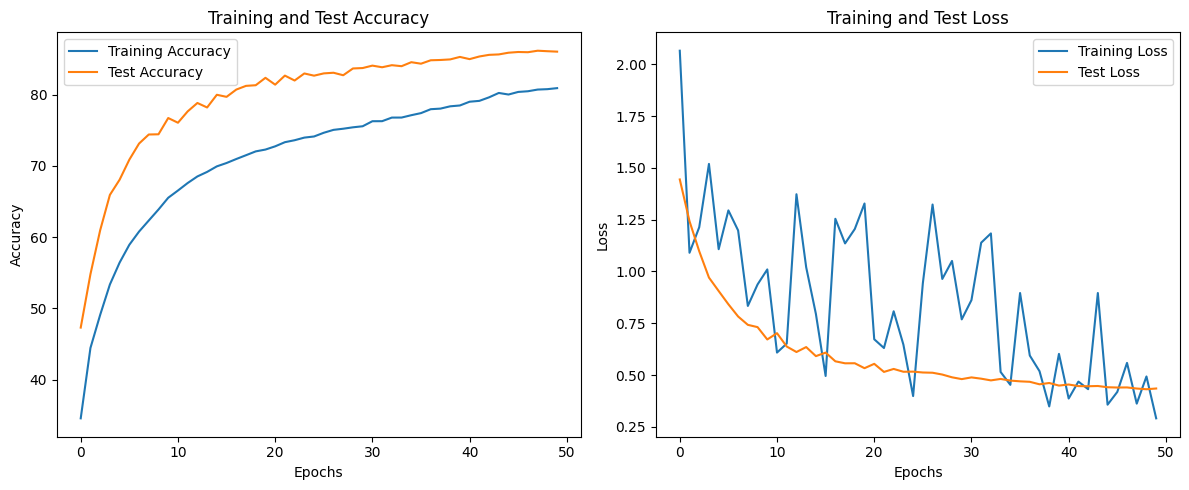

In [23]:
import matplotlib.pyplot as plt


epochs = range(len(train_accuracy))

# Create a new figure
plt.figure(figsize=(12, 5))

# Create a subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Create a subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the figure
plt.tight_layout()
plt.show()

Text(0, 0.5, 'learning rate')

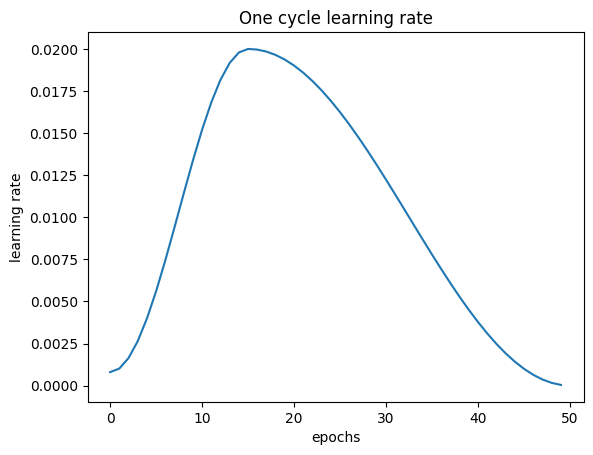

In [24]:
plt.plot(epochs, learning_rate)
plt.title('One cycle learning rate')
plt.xlabel('epochs')
plt.ylabel('learning rate')

In [25]:

torch.save(model.state_dict(), 'final_model.pth')

model = Net()

model.load_state_dict(torch.load('final_model.pth'))

model.eval()

Net(
  (convblock1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.05, inplace=False)
  )
  (convblock2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.05, inplace=False)
  )
  (convblock3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.05, inplace=False)
  )
  (pool1): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (convblock4): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fa

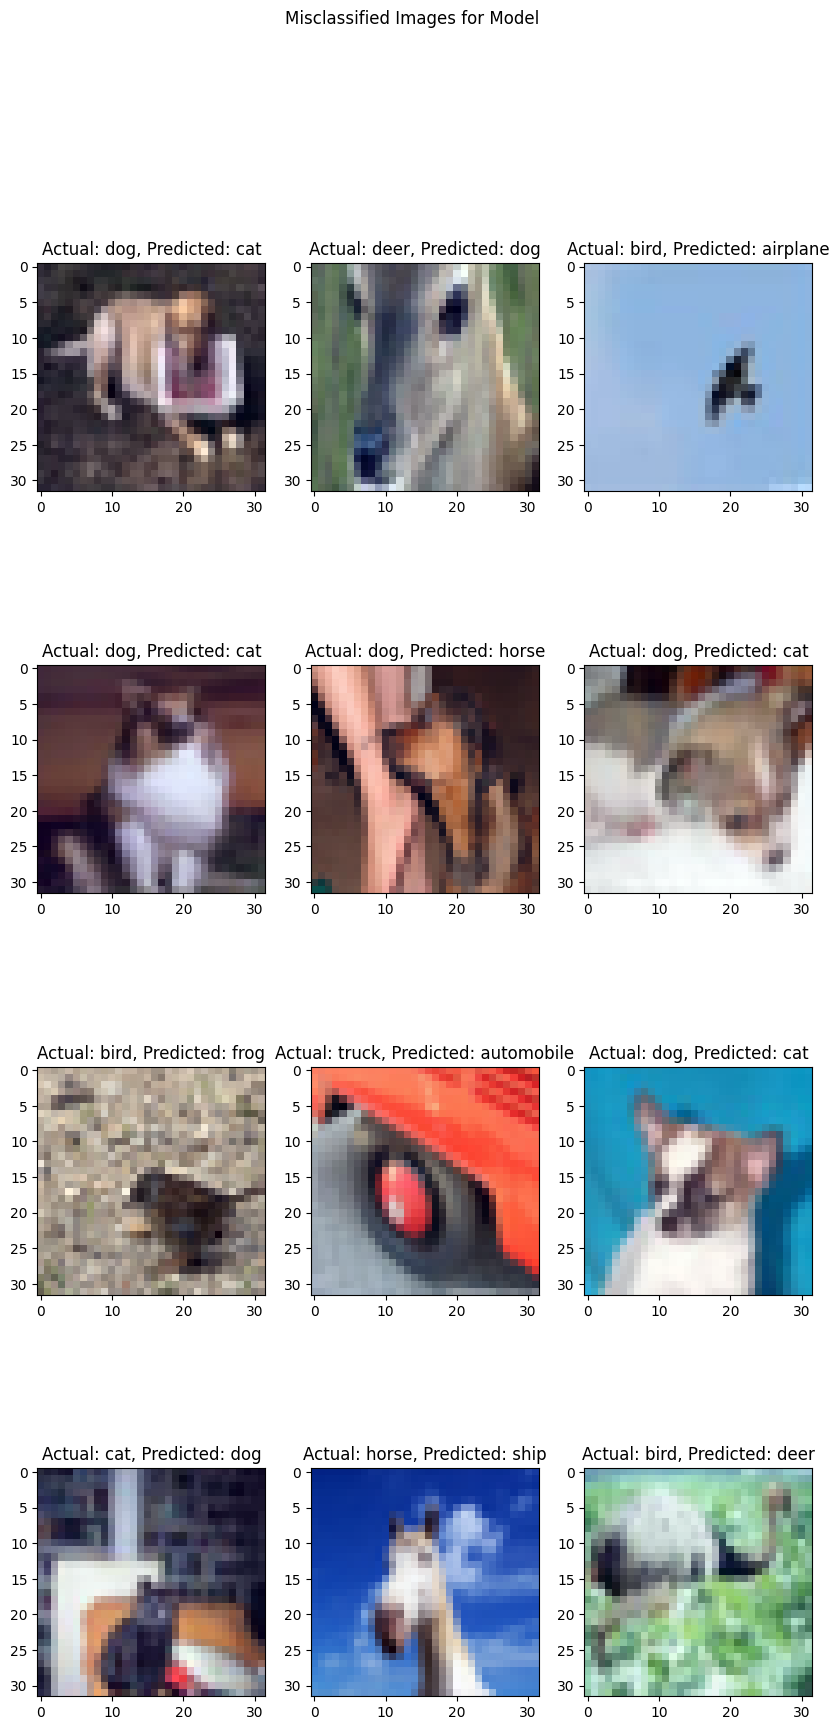

In [26]:
from utils import test_and_find_misclassified, display_misclassified_images
misclassified_images, misclassified_labels, misclassified_preds = test_and_find_misclassified(model, test_loader,torch.device('cpu'))
display_misclassified_images(misclassified_images[0][:12], misclassified_labels[0][:12], misclassified_preds[0][:12], 'Misclassified Images for Model')